# Human Activity Recognition

## All Code

**Future Improvements for this section**
- Create a custom function for reading and creating the train and test dataframes from text data

In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
# Reading the feature names from feature text file

features = list()
with open('../data/UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [4]:
# checking if there are duplicate features in the list
len(features) != len(set(features))

True

In [5]:
# converting the features to unique names

for i,x in enumerate(features):
    features[i] = x+"_"+str(i)


In [6]:
# finding the duplicates feature names
# https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them
seen = set()
dupes = []

for x in features:
    if x in seen:
        dupes.append(x)
    else:
        seen.add(x)

In [7]:
# Checking is any duplicate feature names
dupes

[]

In [8]:
# Getting the train data

X_train = pd.read_csv('../data/UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=0)
X_train.columns = features
X_train.shape

(7351, 561)

In [9]:
X_train.head()

,tBodyAcc-mean()-X_0,tBodyAcc-mean()-Y_1,tBodyAcc-mean()-Z_2,tBodyAcc-std()-X_3,tBodyAcc-std()-Y_4,tBodyAcc-std()-Z_5,tBodyAcc-mad()-X_6,tBodyAcc-mad()-Y_7,tBodyAcc-mad()-Z_8,tBodyAcc-max()-X_9,...,fBodyBodyGyroJerkMag-meanFreq()_551,fBodyBodyGyroJerkMag-skewness()_552,fBodyBodyGyroJerkMag-kurtosis()_553,"angle(tBodyAccMean,gravity)_554","angle(tBodyAccJerkMean),gravityMean)_555","angle(tBodyGyroMean,gravityMean)_556","angle(tBodyGyroJerkMean,gravityMean)_557","angle(X,gravityMean)_558","angle(Y,gravityMean)_559","angle(Z,gravityMean)_560"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [10]:
# Getting the subject (Person under study data) as a new column to the train dataset

X_train['subject'] = pd.read_csv('../data/UCI_HAR_dataset/train/subject_train.txt', header = None)

In [11]:
# Adding the y train data

y_train = pd.read_csv('../data/UCI_HAR_dataset/train/y_train.txt', names=['Activity'])

In [12]:
# Create the dictionary of the y_train activity data

activity_dictionary = {1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'}
y_train_labels = [activity_dictionary[x] for x in y_train.squeeze().values]

In [13]:
y_train.squeeze()

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: Activity, Length: 7352, dtype: int64

In [14]:
# Adding the information to the train dataframe

train = X_train
train['Activity'] = y_train.squeeze()
train['ActivityName'] = pd.Series(y_train_labels)
train.sample()

,tBodyAcc-mean()-X_0,tBodyAcc-mean()-Y_1,tBodyAcc-mean()-Z_2,tBodyAcc-std()-X_3,tBodyAcc-std()-Y_4,tBodyAcc-std()-Z_5,tBodyAcc-mad()-X_6,tBodyAcc-mad()-Y_7,tBodyAcc-mad()-Z_8,tBodyAcc-max()-X_9,...,"angle(tBodyAccMean,gravity)_554","angle(tBodyAccJerkMean),gravityMean)_555","angle(tBodyGyroMean,gravityMean)_556","angle(tBodyGyroJerkMean,gravityMean)_557","angle(X,gravityMean)_558","angle(Y,gravityMean)_559","angle(Z,gravityMean)_560",subject,Activity,ActivityName
1496,0.277616,-0.009641,-0.086616,-0.998509,-0.982777,-0.974123,-0.999001,-0.981226,-0.972009,-0.944603,...,-0.015257,-0.07825,0.246742,0.332048,-0.877624,0.158335,-0.044673,7,5,STANDING


In [15]:
# Perform the above operations for the test data

X_test = pd.read_csv('../data/UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=0)
X_test.columns = features
X_test.shape

(2946, 561)

In [16]:

X_test['subject'] = pd.read_csv('../data/UCI_HAR_dataset/test/subject_test.txt', header = None)
y_test = pd.read_csv('../data/UCI_HAR_dataset/test/y_test.txt', names=['Activity'])
y_test_labels = [activity_dictionary[x] for x in y_test.squeeze().values]


In [17]:
# Adding the information to the test dataframe

test = X_test
test['Activity'] = y_test.squeeze()
test['ActivityName'] = pd.Series(y_test_labels)
test.sample()

,tBodyAcc-mean()-X_0,tBodyAcc-mean()-Y_1,tBodyAcc-mean()-Z_2,tBodyAcc-std()-X_3,tBodyAcc-std()-Y_4,tBodyAcc-std()-Z_5,tBodyAcc-mad()-X_6,tBodyAcc-mad()-Y_7,tBodyAcc-mad()-Z_8,tBodyAcc-max()-X_9,...,"angle(tBodyAccMean,gravity)_554","angle(tBodyAccJerkMean),gravityMean)_555","angle(tBodyGyroMean,gravityMean)_556","angle(tBodyGyroJerkMean,gravityMean)_557","angle(X,gravityMean)_558","angle(Y,gravityMean)_559","angle(Z,gravityMean)_560",subject,Activity,ActivityName
2086,0.278597,-0.017484,-0.103742,-0.996415,-0.987798,-0.98726,-0.996502,-0.988593,-0.988078,-0.940481,...,-0.056964,-0.160548,-0.408103,0.550934,-0.927325,0.137265,0.051404,18,4,SITTING


In [18]:
# Changing the column names to reasonable names

train.columns = train.columns.str.replace('[()]', '')
train.columns = train.columns.str.replace('[-,]', '_')

test.columns = test.columns.str.replace('[()]', '')
test.columns = test.columns.str.replace('[-,]', '_')

C:\Users\ranji\AppData\Local\Temp\ipykernel_41828\3651451505.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train.columns = train.columns.str.replace('[()]', '')
C:\Users\ranji\AppData\Local\Temp\ipykernel_41828\3651451505.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train.columns = train.columns.str.replace('[-,]', '_')
C:\Users\ranji\AppData\Local\Temp\ipykernel_41828\3651451505.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  test.columns = test.columns.str.replace('[()]', '')
C:\Users\ranji\AppData\Local\Temp\ipykernel_41828\3651451505.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  test.columns = test.columns.str.replace('[-,]', '_')


## Data Cleaning

In [19]:
# Checking if any rows are duplicates
print(f'train data number of duplicates, {sum(train.duplicated())}')
print(f'test data number of duplicates, {sum(test.duplicated())}')

# Checking for Null or Nan values in train and test data
print(f'train data number of null or Nan, {train.isnull().values.sum()}')
print(f'test data number of null or Nan, {test.isnull().values.sum()}')

train data number of duplicates, 0
test data number of duplicates, 0
train data number of null or Nan, 0
test data number of null or Nan, 0


## Data Count

In [20]:
def data_count_plot(df, colname):
    data_bygroup = df.groupby([colname]).size()

    plt.barh(data_bygroup.index, data_bygroup.values)
    plt.ylabel(colname)
    plt.xlabel("Counts")
    plt.title(f"DataCount in dataset")
    plt.show()

    

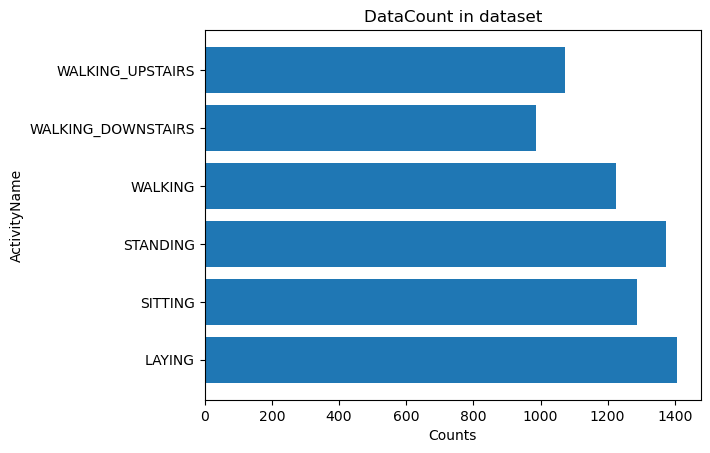

In [21]:
# Seeing the datacount in train dataframe

data_count_plot(train, "ActivityName")

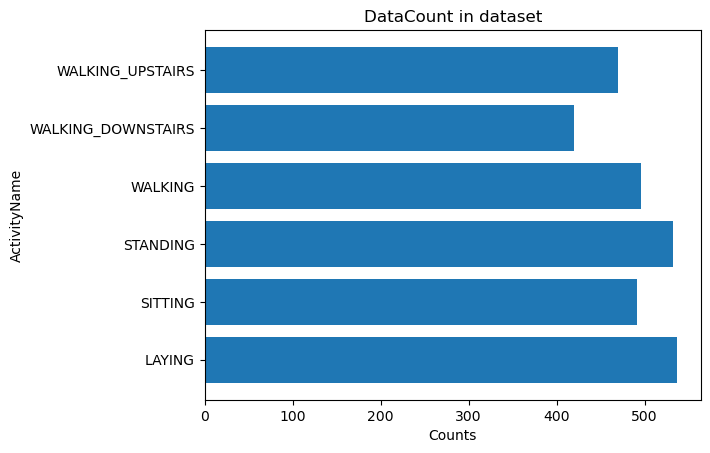

In [22]:
# Seeing the datacount in test dataframe

data_count_plot(test, "ActivityName")

Thus we have a fairly balanced data across all activities

In [23]:
# export dataframes to csv
path = '../data/processed/csv_files/'

if not os.path.exists(path):
    os.makedirs(path)
train.to_csv('../data/processed/csv_files/train.csv', index=False)
test.to_csv('../data/processed/csv_files/test.csv', index=False)

### Exploratory Data Analysis

Let's look at some interesting features from the columns that may seem to have correlation with the activity being performed

In [24]:
feature_list = train.columns

In [25]:
plotting_features_prefix = ['tGravityAcc_mean', 'tBodyAccMag_mean', 'tBodyAccJerkMag_mean', 'tBodyGyroMag_mean', 'fBodyAccMag_mean']

In [26]:
from re import match

plotting_features = []

for feat in plotting_features_prefix:
    filtered_values = list(filter(lambda v: match(feat+'*', v), feature_list))
    plotting_features.extend(filtered_values)
print(plotting_features)

['tGravityAcc_mean_X_40', 'tGravityAcc_mean_Y_41', 'tGravityAcc_mean_Z_42', 'tBodyAccMag_mean_200', 'tBodyAccJerkMag_mean_226', 'tBodyGyroMag_mean_239', 'fBodyAccMag_mean_502', 'fBodyAccMag_meanFreq_512']


Let's plot some of these features to get an understanding of their relationship with the activity performed

In [27]:
def density_dist(df, feat, opacity):
    """ Function to plot the density distribution of the provided feature"""
    
    p = alt.Chart(df,
             width = 400,
             height = 400
             ).transform_density(
        feat,
        groupby = ['ActivityName'],
        as_=[feat, 'density'],
    ).mark_area(opacity = opacity).encode(
        x=feat,
        y='density:Q',
        color = 'ActivityName'
    )
    
    return p

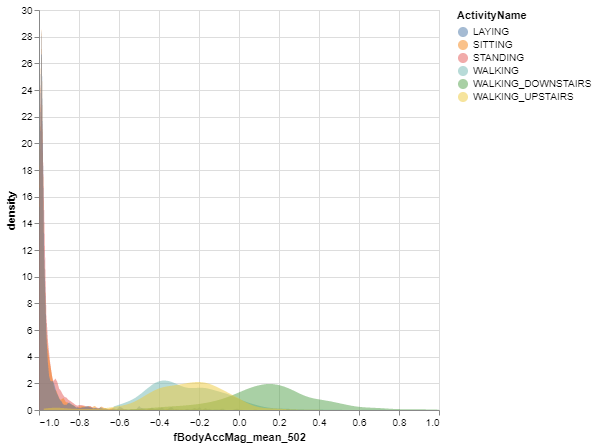

In [28]:
density_dist(train, 'fBodyAccMag_mean_502', 0.5)

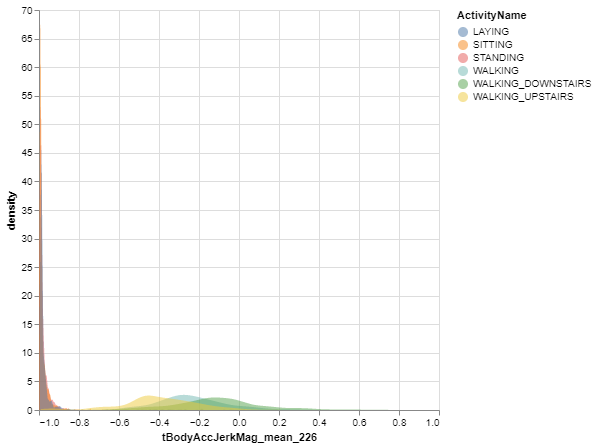

In [29]:
density_dist(train,'tBodyAccJerkMag_mean_226', 0.5)

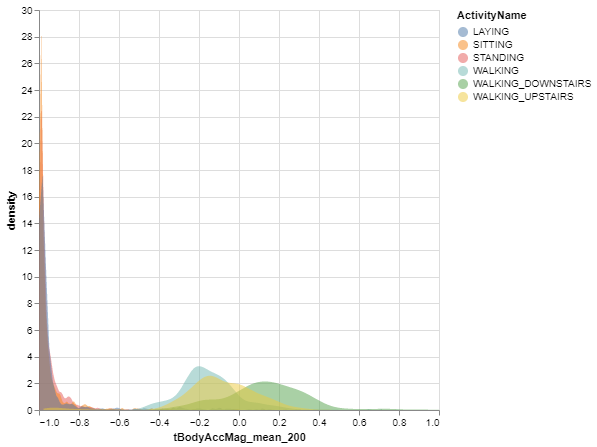

In [30]:
density_dist(train, 'tBodyAccMag_mean_200', 0.5)

**Inference**

* It is seen that the activities that involve walking seem to have similar feature metrics. Likewise the activities that are less demanding like laying down, sitting or standing have similar feature metrics density distribution

* Even though the density plots may be similar for some activities there are differences in the specific values. This can be further explored using boxplots

In [31]:
# Making boxplots for the Body Acceleration Mean

def boxplot(df, feat):
    """ Function to plot the boxplot of the provided feature"""
    
    box = alt.Chart(df,
             width = 400,
             height = 400,
                    title = "Box plot of "+feat
             ).mark_boxplot(size = 50).encode(
        y = alt.Y('ActivityName', axis = alt.Axis(title = 'Activity Name')),
        x = alt.X(feat),
        color = 'ActivityName'
    ).configure_axis(
    labelFontSize=12,
    titleFontSize=12
    )
    
    return box

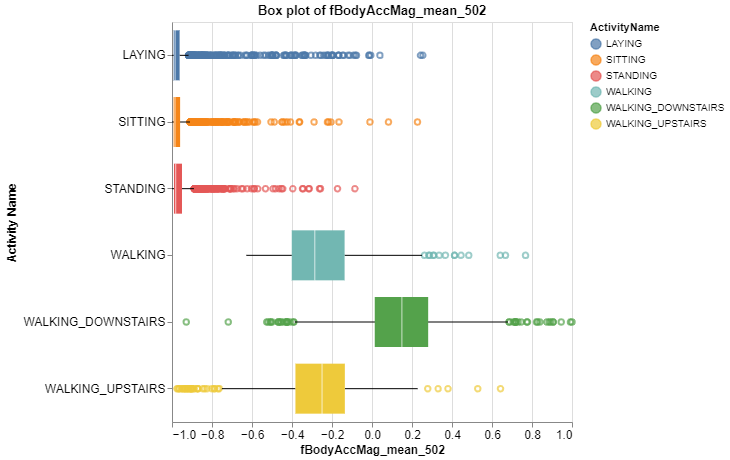

In [32]:
boxplot(train, 'fBodyAccMag_mean_502')

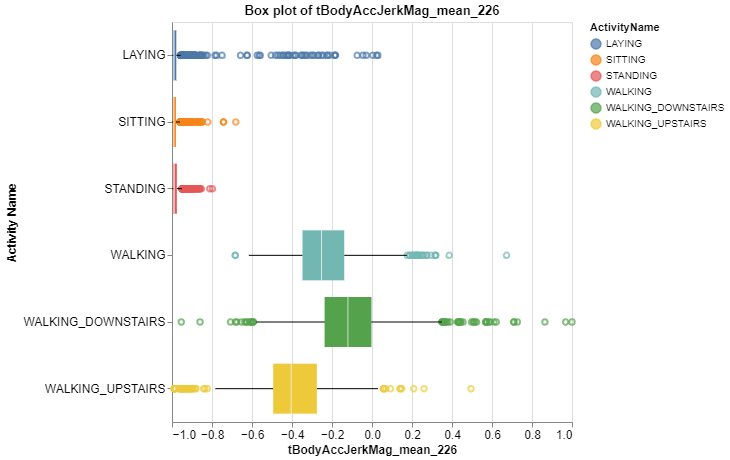

In [33]:
boxplot(train, 'tBodyAccJerkMag_mean_226')

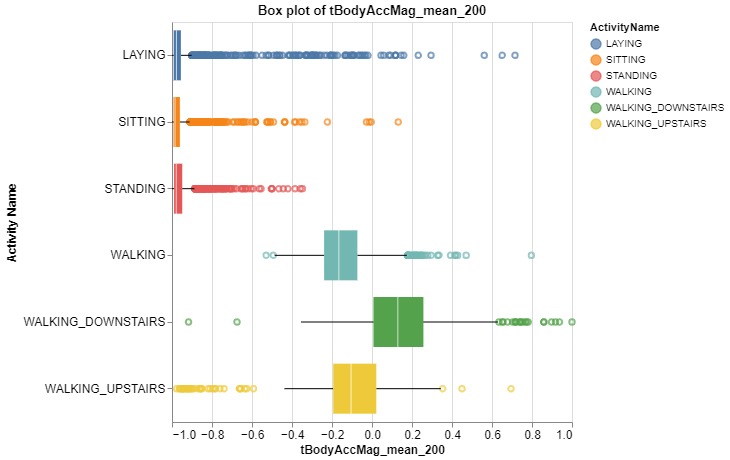

In [34]:
boxplot(train, 'tBodyAccMag_mean_200')

In [35]:
# Looking at the positioning of the body

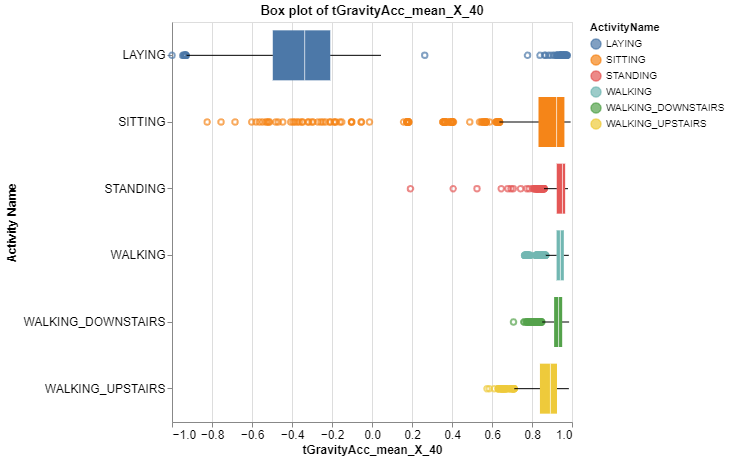

In [36]:
boxplot(train, 'tGravityAcc_mean_X_40')

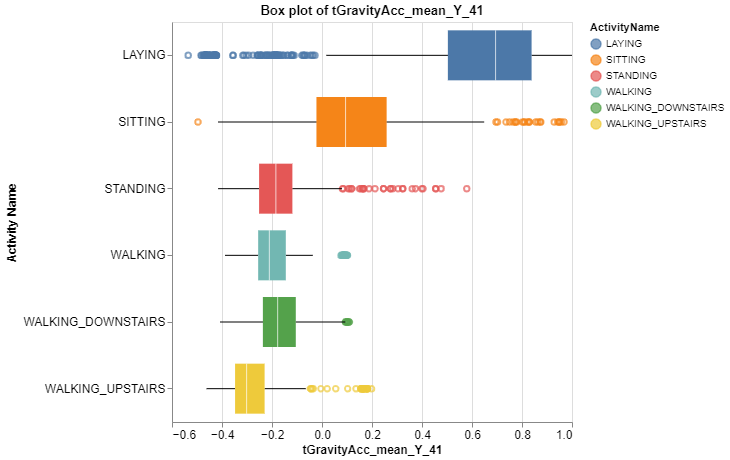

In [37]:
boxplot(train, 'tGravityAcc_mean_Y_41')

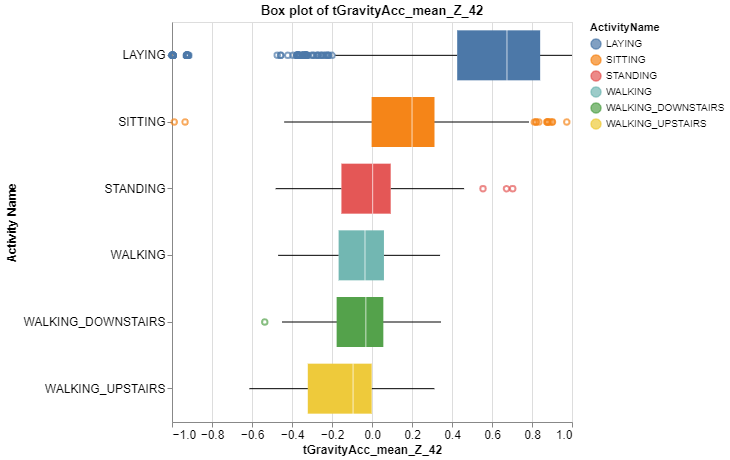

In [38]:
boxplot(train, 'tGravityAcc_mean_Z_42')

**Inference**

* There is a clear distinction in the magnitude of the features for the two groups of activities of distinct efforts (Laying, sitting, standing) and (walking, walking downstairs and walking upstairs)

* Features on gravity based measures also distinctly vary depending on the body position as related to the physical activity being performed.

### Performing and visualizing dimensionality reduction using T-SNE

In [39]:
from sklearn.manifold import TSNE
import seaborn as sns

In [40]:
# preparing the data for TSNE

x = train.drop(['subject', 'ActivityName', 'Activity'], axis = 1)
y = train['ActivityName']

In [41]:
def plot_tsne(x,y,perplexity=10):
    """function to plot the tsne for provided perplexity"""
    tsne = TSNE(n_components = 2, verbose = 1, perplexity = perplexity, random_state = 123)
    z = pd.DataFrame(tsne.fit_transform(x), columns = ['col1', 'col2'])
    cols = list(z.columns)
    
    z['ActivityName'] = y.values
    
    # plotting
    plot = sns.scatterplot(data = z,
                           x = z['col1'],
                           y = z['col2'],
                           hue = z['ActivityName'], legend = 'brief')
    
    plot.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0), ncol=1)
    plt.title(f'TSNE with perplexity {perplexity}')
    # Set x-axis label
    plt.xlabel('TSNE Feature Column 1')
    # Set y-axis label
    plt.ylabel('TSNE Feature Column 2')
    
    return plot

C:\Users\ranji\miniconda3\envs\aaic\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ranji\miniconda3\envs\aaic\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.019s...
[t-SNE] Computed neighbors for 7351 samples in 0.560s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.133804
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.324371
[t-SNE] KL divergence after 1000 iterations: 1.496858


<AxesSubplot: title={'center': 'TSNE with perplexity 10'}, xlabel='TSNE Feature Column 1', ylabel='TSNE Feature Column 2'>

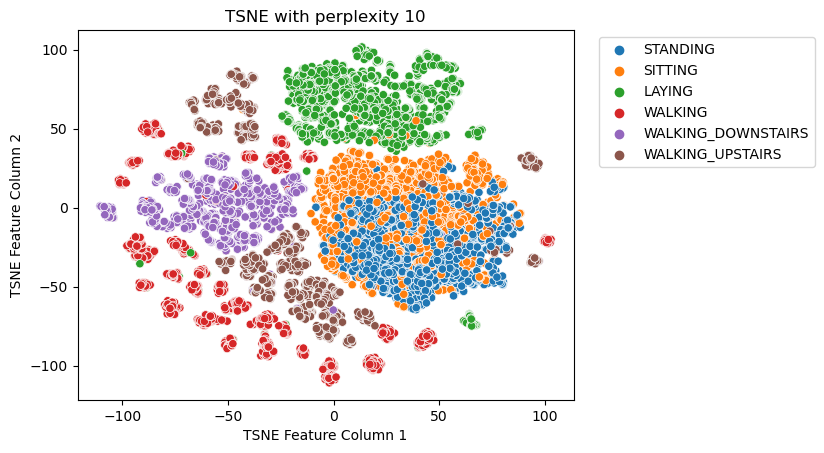

In [42]:
plot_tsne(x,y, 10)

C:\Users\ranji\miniconda3\envs\aaic\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ranji\miniconda3\envs\aaic\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7351 samples in 0.021s...
[t-SNE] Computed neighbors for 7351 samples in 0.616s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7351
[t-SNE] Computed conditional probabilities for sample 2000 / 7351
[t-SNE] Computed conditional probabilities for sample 3000 / 7351
[t-SNE] Computed conditional probabilities for sample 4000 / 7351
[t-SNE] Computed conditional probabilities for sample 5000 / 7351
[t-SNE] Computed conditional probabilities for sample 6000 / 7351
[t-SNE] Computed conditional probabilities for sample 7000 / 7351
[t-SNE] Computed conditional probabilities for sample 7351 / 7351
[t-SNE] Mean sigma: 1.348503
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.011284
[t-SNE] KL divergence after 1000 iterations: 1.363088


<AxesSubplot: title={'center': 'TSNE with perplexity 30'}, xlabel='TSNE Feature Column 1', ylabel='TSNE Feature Column 2'>

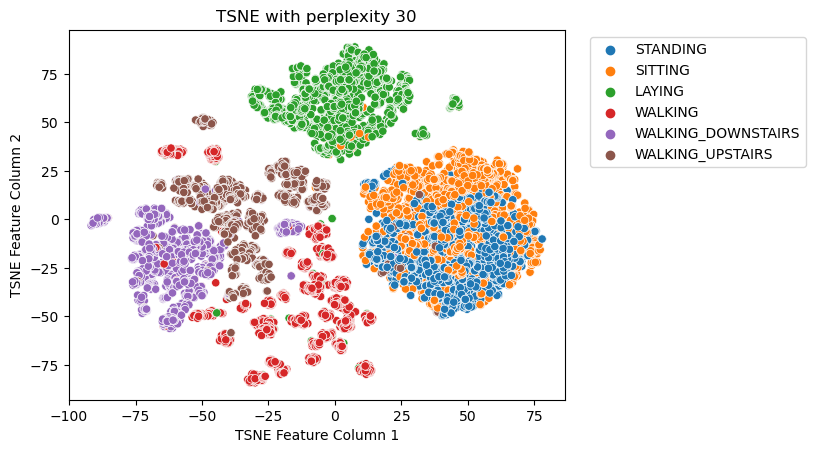

In [43]:
plot_tsne(x,y, 30)

### Performing the ML

In [44]:
# The classification models to be used are SVC, logistic regression, randomforest, xgboost and light 
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split
)
from sklearn.metrics import classification_report, confusion_matrix  

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [45]:
# Creating the train and test sets

X_train, y_train = train.drop(['subject', 'Activity', 'ActivityName'], axis = 1), train['ActivityName']
X_test, y_test = test.drop(['subject', 'Activity', 'ActivityName'], axis = 1), test['ActivityName']

In [46]:
# Seeing the shape of the dataset

In [47]:
print(f'The shape of train data {X_train.shape}')
print(f'The shape of train data {X_test.shape}')

The shape of train data (7351, 561)
The shape of train data (2946, 561)


In [48]:
# function to cross validate and capture the results

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data
    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

### SVC with GridSearchCV

In [49]:
param_grid = {'C':[0.1, 1, 10, 100],
             'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  14.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  14.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  10.9s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [50]:
grid.best_estimator_

SVC(C=0.1, gamma=0.01, kernel='poly')

In [52]:
results_dict = dict()

In [54]:
results_dict['SVC'] = mean_std_cross_val_scores(grid.best_estimator_, X_train, y_train)

In [57]:
# Results with SVC

pd.DataFrame(results_dict).T

,SVC
fit_time,0.990 (+/- 0.051)
score_time,0.446 (+/- 0.005)
test_score,0.904 (+/- 0.021)


### LogisticRegression with GridSearchCV

In [58]:
param_grid = {'C':[0.1, 1, 10, 100]}

grid_logreg = GridSearchCV(
    LogisticRegression(n_jobs = -1,
                       multi_class = 'multinomial',
                       random_state=123),
    param_grid,
    refit=True,
    verbose=1)
grid_logreg.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   3.5s
[CV] END ..............................................C=0.1; total time=   1.7s
[CV] END ..............................................C=0.1; total time=   1.8s
[CV] END ..............................................C=0.1; total time=   1.8s
[CV] END ..............................................C=0.1; total time=   2.0s
[CV] END ................................................C=1; total time=   1.8s
[CV] END ................................................C=1; total time=   1.7s
[CV] END ................................................C=1; total time=   2.0s
[CV] END ................................................C=1; total time=   1.9s
[CV] END ................................................C=1; total time=   1.8s
[CV] END ...............................................C=10; total time=   1.8s
[CV] END ........................................

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', n_jobs=-1,
                                          random_state=123),
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=2)

In [61]:
grid_logreg.best_estimator_

LogisticRegression(C=0.1, multi_class='multinomial', n_jobs=-1,
                   random_state=123)

In [59]:
results_dict['logreg'] = mean_std_cross_val_scores(grid_logreg.best_estimator_, X_train, y_train)

In [60]:
# Results with SVC and logistic regression

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score
SVC,0.990 (+/- 0.051),0.446 (+/- 0.005),0.904 (+/- 0.021)
logreg,2.018 (+/- 0.030),0.014 (+/- 0.006),0.895 (+/- 0.029)


### Randomforest with GridSearchCV

In [62]:
param_grid = {'n_estimators':[10, 25, 50, 75, 100],
             'max_depth': [1, 2, 3, 4, 5, None]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state = 123, n_jobs = -1),
                    param_grid,
                    refit=True,
                    verbose=1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'n_estimators': [10, 25, 50, 75, 100]},
             verbose=1)

In [64]:
grid_rf.best_params_

{'max_depth': None, 'n_estimators': 100}

In [65]:
results_dict['random forest'] = mean_std_cross_val_scores(grid_rf.best_estimator_, X_train, y_train)

In [66]:
# Results with SVC, logistic regression and random forest

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score
SVC,0.990 (+/- 0.051),0.446 (+/- 0.005),0.904 (+/- 0.021)
logreg,2.018 (+/- 0.030),0.014 (+/- 0.006),0.895 (+/- 0.029)
random forest,1.381 (+/- 0.108),0.065 (+/- 0.027),0.891 (+/- 0.020)


### XGBoost with GridSearchCV

In [68]:
from sklearn.preprocessing import LabelEncoder
# encode string class values as integers

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
label_encoded_y = label_encoder.transform(y_train)

In [69]:
param_grid = {'eta':[0.01, 0.1, 0.2, 0.3],
             'max_depth': [1, 2, 3, 4, 5, None]
             }

grid_xgb = GridSearchCV( xgb.XGBClassifier(n_jobs= -1),
                    param_grid,
                    refit=True,
                    verbose=1)
grid_xgb.fit(X_train,label_encoded_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4, 5, None]},
             verbose=1)

In [70]:
grid_xgb.best_params_

{'eta': 0.3, 'max_depth': 2}

In [71]:
results_dict['xgb'] = mean_std_cross_val_scores(grid_xgb.best_estimator_, X_train, label_encoded_y)

In [72]:
# Results with SVC, logistic regression, random forest and xgb
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score
SVC,0.990 (+/- 0.051),0.446 (+/- 0.005),0.904 (+/- 0.021)
logreg,2.018 (+/- 0.030),0.014 (+/- 0.006),0.895 (+/- 0.029)
random forest,1.381 (+/- 0.108),0.065 (+/- 0.027),0.891 (+/- 0.020)
xgb,14.107 (+/- 0.541),0.028 (+/- 0.002),0.903 (+/- 0.026)


### Light GBM with GridSearchCV

In [75]:
param_grid = {'learning_rate': [0.005, 0.01],
             'n_estimators': [8,16,24],
             'num_leaves': [6,8,12,16]}

grid_lgbm = GridSearchCV(lgb.LGBMClassifier(n_jobs= -1),
                    param_grid,
                    refit=True,
                    verbose=1)
grid_lgbm.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.005, 0.01],
                         'n_estimators': [8, 16, 24],
                         'num_leaves': [6, 8, 12, 16]},
             verbose=1)

In [76]:
grid_lgbm.best_params_

{'learning_rate': 0.01, 'n_estimators': 24, 'num_leaves': 6}

In [77]:
results_dict['lgbm'] = mean_std_cross_val_scores(grid_lgbm.best_estimator_, X_train, y_train)

In [78]:
# Results with SVC, logistic regression, random forest, xgb and lgbm

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score
SVC,0.990 (+/- 0.051),0.446 (+/- 0.005),0.904 (+/- 0.021)
logreg,2.018 (+/- 0.030),0.014 (+/- 0.006),0.895 (+/- 0.029)
random forest,1.381 (+/- 0.108),0.065 (+/- 0.027),0.891 (+/- 0.020)
xgb,14.107 (+/- 0.541),0.028 (+/- 0.002),0.903 (+/- 0.026)
lgbm,0.618 (+/- 0.012),0.013 (+/- 0.002),0.839 (+/- 0.031)


### Using LSTM